In [1]:
%load_ext autoreload
%autoreload 2

import ncem

usr = !echo $USER
datadir = '.'

# Load data

In [2]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_path=datadir + '/busch/',
    data_origin='jarosch',
    radius=80,
    node_label_space_id='type',
    node_feature_space_id='standard',
    merge_node_types_predefined=True
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])

  0%|          | 0/2 [00:00<?, ?it/s]

Loading data from raw files
registering celldata
collecting image-wise celldata
adding graph-level covariates


100%|██████████| 2/2 [00:00<00:00, 21.16it/s]

Loaded 2 images with complete data from 1 patients over 11321 cells with 19 cell features and 12 distinct celltypes.
Mean of mean node degree per images across images: 18.522793

 Celldata metadata: {'lateral_resolution': 0.5, 'fn': 'raw_inflamed_colon_1.h5ad', 'image_col': 'Annotation', 'pos_cols': ['X', 'Y'], 'cluster_col': 'celltype_Level_2', 'cluster_col_preprocessed': 'celltype_Level_2_preprocessed', 'patient_col': None}


# Supp. Fig. 1: Cell-type centric summary statistics in chip cytometry dataset. 

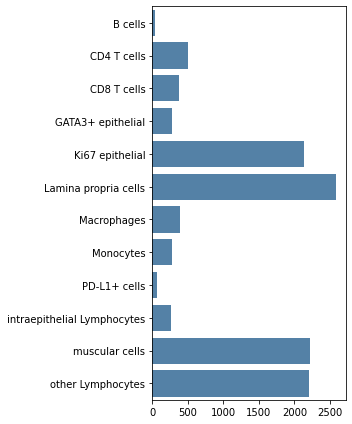

In [3]:
interpreter.data.celltype_frequencies()

0.0
1.0277843237036042
2.0687580050480765
5.883873096223624
19.52279334540473
104.03451859527686
1182.610210062652
5660.5


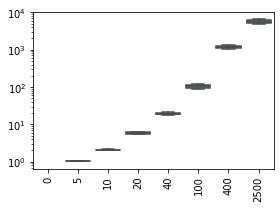

In [4]:
interpreter.data.plot_degree_vs_dist(
    max_distances=[0, 10, 20, 40, 80, 200, 800, 5000],
    lateral_resolution=0.5,
)

# Supp. Fig. 2: Variance decomposition in chip cytometry dataset.

100%|██████████| 2/2 [00:05<00:00,  2.84s/it]


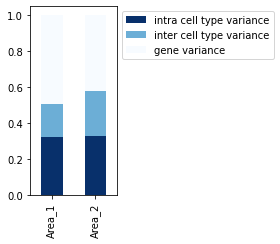

In [5]:
var_decomp = interpreter.data.compute_variance_decomposition()
interpreter.data.variance_decomposition(
    var_decomp, figsize=(4.,3.5)
)

In [6]:
var_decomp.mean(axis=0)[['intra cell type variance', 'inter cell type variance', 'gene variance']]

intra cell type variance    0.325813
inter cell type variance    0.218986
gene variance               0.455201
dtype: float32

# Supp. Fig. 6: Normalised contact frequencies of cell-types in spatial neighborhoods

100%|██████████| 2/2 [00:01<00:00,  1.13it/s]


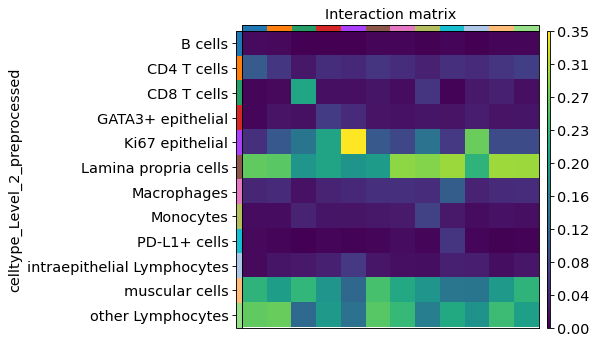

In [7]:
interpreter.data.celldata_interaction_matrix(figsize=(4,4))

# Supp. Fig. 7: Ligand–receptor permutation test. 

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


n cells: 11321


  0%|          | 0/1000 [00:00<?, ?permutation/s]

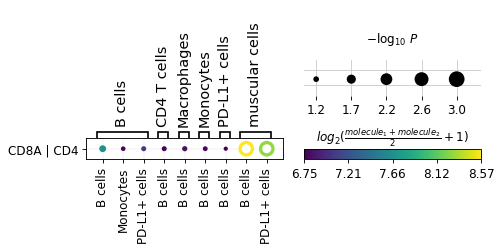

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [8]:
hgnc_names = [
    'CD14', 
    'MS4A1', 
    'IL2RA', 
    'CD3G', 
    'CD4', 
    'PTPRC',
    'PTPRC',
    'PTPRC',
    'CD68', 
    'CD8A', 
    'KRT5', # 'KRT1', 'KRT14'
    'FOXP3', 
    'GATA3', 
    'MKI67', 
    'Nuclei',
    'PDCD1', 
    'CD274', 
    'SMN1', 
    'VIM'
]
adata = interpreter.data.ligrec(hgnc_names=hgnc_names)

# Supp. Fig. 8: Attributing cell heterogeneity to niche composition in Cd8 Tcells in inflamed colon. 

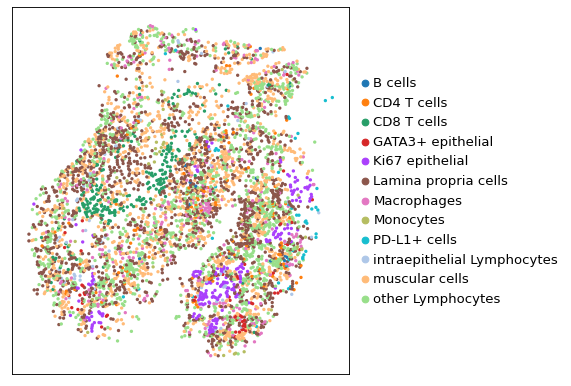

In [9]:
interpreter.data.spatial(image_key= "Area_1", copy=False)

n cells:  234
CD8 T cells 0    74
CD8 T cells 1    58
CD8 T cells 2    41
CD8 T cells 3    37
CD8 T cells 4    24
Name: CD8 T cells substates, dtype: int64


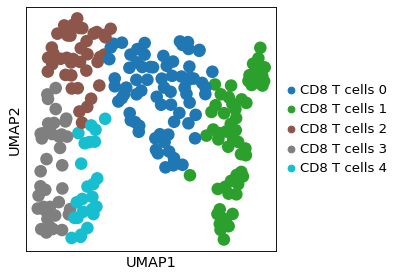

In [10]:
adata = interpreter.data.umap(
    image_key= "Area_1",
    target_cell_type='CD8 T cells',
    n_neighbors=22,
    n_pcs=None,
    palette='tab10'
)

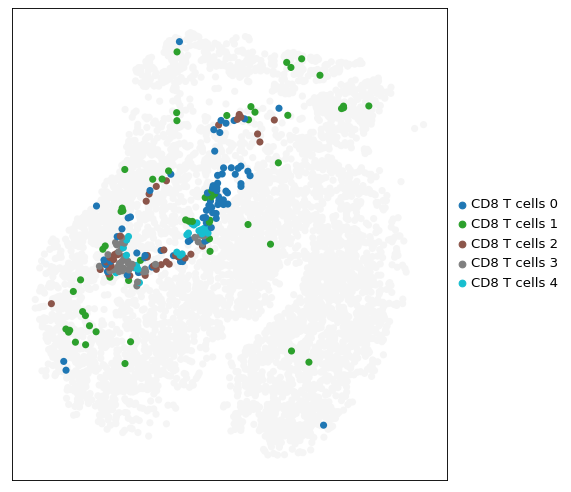

In [11]:
interpreter.data.spatial_substates(
    adata,
    image_key= "Area_1",
    target_cell_type='CD8 T cells',
    spot_size=50
)

In [12]:
filter_titles = [
    'B cells',
    'CD4 T cells',
    'CD8 T cells',
    'GATA3+ epithelial',
    'Ki67 epithelial',
    'Lamina propria cells',
    'Macrophages',
    'Monocytes',
    'intraepithelial Lymphocytes',
    'muscular cells',
    'other Lymphocytes'
]

adata_img, adata, log_pval, fold_change = interpreter.data.compute_cluster_enrichment(
    image_key=['Area_1'],
    target_cell_type='CD8 T cells',
    clip_pvalues=-5,
    n_neighbors=22,
    n_pcs=None,
    filter_titles=filter_titles
)

100%|██████████| 16/16 [00:03<00:00,  4.73it/s]


n cells:  234
CD8 T cells 0    74
CD8 T cells 1    58
CD8 T cells 2    41
CD8 T cells 3    37
CD8 T cells 4    24
Name: CD8 T cells substates, dtype: int64


... storing 'Annotation' as categorical


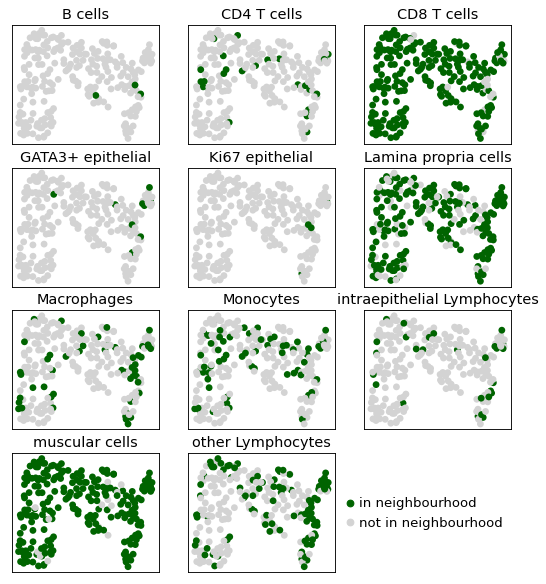

In [13]:
interpreter.data.umaps_cluster_enrichment(
    adata, 
    nrows=4,
    ncols=3,
    figsize=(8,9),
    filter_titles=filter_titles,
    size=150
)

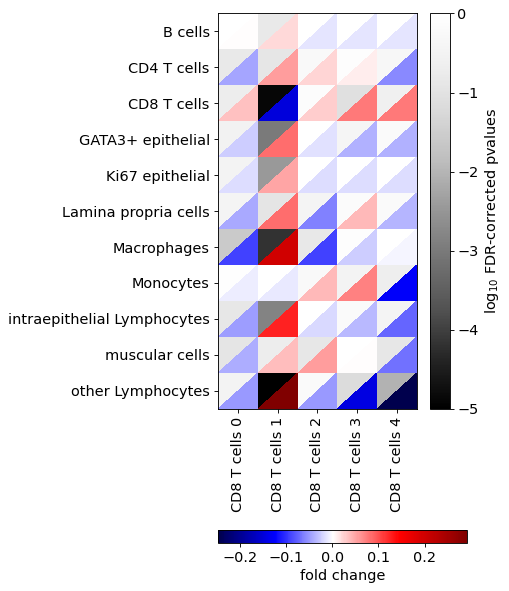

In [14]:
interpreter.data.cluster_enrichment(
    pvalues=log_pval, 
    fold_change=fold_change,
    pad=0.2,
)

# Supp. Fig. 13: Distributional characteristics of gene expression measurements of single cells from spatial molecular profiling assays.

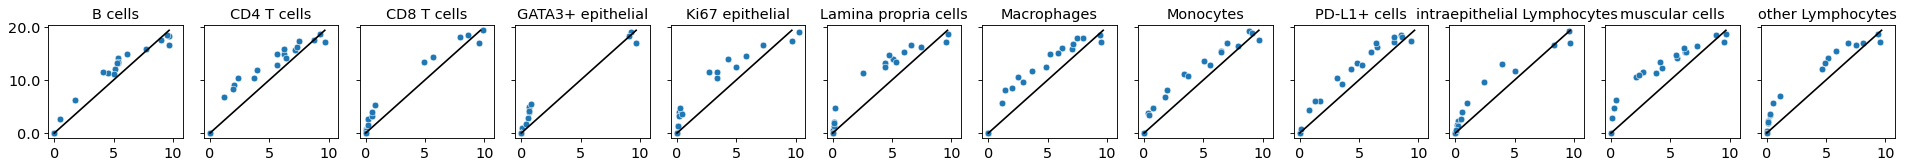

In [15]:
interpreter.data.noise_structure()